In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def display_image(title, image):
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [42]:
image = cv2.imread('church.jpg', cv2.IMREAD_GRAYSCALE)
gray_negative = 255 - image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
binary_negative = 255 - binary_image

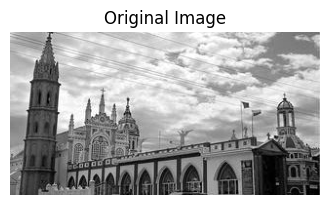

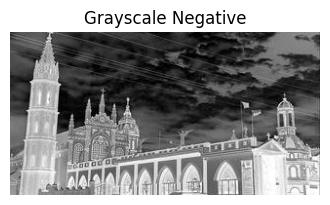

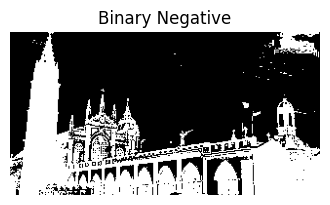

In [43]:
display_image('Original Image', image)
display_image('Grayscale Negative', gray_negative)
display_image('Binary Negative', binary_negative)

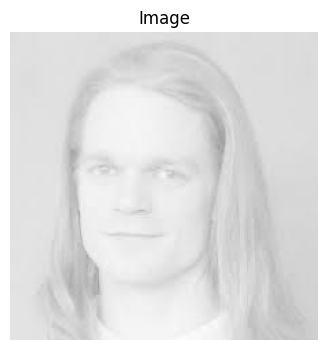

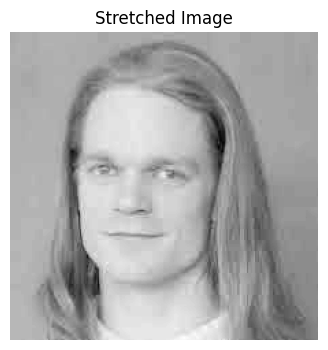

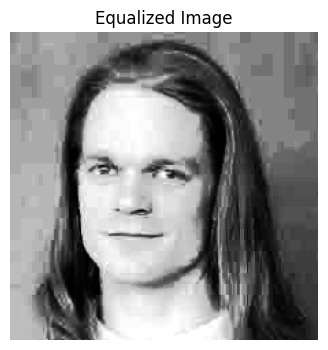

In [44]:
image = cv2.imread('image3.jpeg', cv2.IMREAD_GRAYSCALE)

M1_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_image('Image', M1_rgb)

def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) * (255 / (max_val - min_val))
    return stretched.astype(np.uint8)

stretched_image = contrast_stretching(image)
display_image('Stretched Image', stretched_image)

equalized_image = cv2.equalizeHist(image)
display_image('Equalized Image', equalized_image)

In [45]:
def plot_histogram(image, title):
    plt.figure(figsize=(3,3))
    plt.hist(image.ravel(), bins=256, range=[0,256], color='green')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

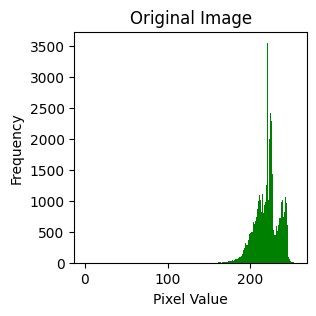

In [46]:
plot_histogram(image, 'Original Image')

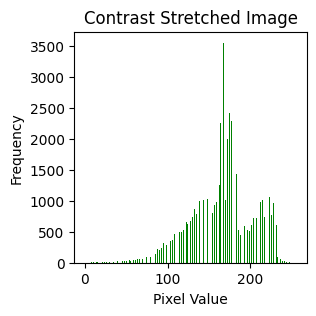

In [47]:
plot_histogram(stretched_image, 'Contrast Stretched Image')

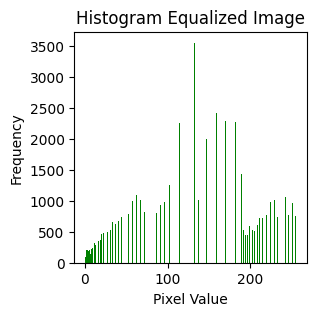

In [48]:
plot_histogram(equalized_image, 'Histogram Equalized Image')

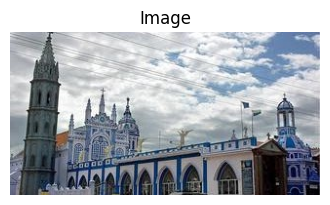

(167, 318, 3)

In [49]:
image = cv2.imread('church.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_image('Image', image)
image.shape

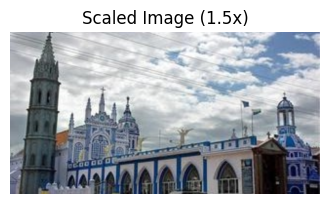

(250, 477, 3)

In [50]:
h, w, _ = image.shape
scaled_image = cv2.resize(image, (int(w * 1.5), int(h * 1.5)), interpolation=cv2.INTER_LINEAR)
display_image('Scaled Image (1.5x)', scaled_image)
scaled_image.shape

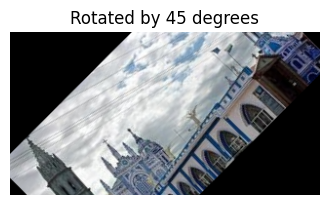

In [51]:
center = (w//2, h//2)
angle = 45
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
display_image('Rotated by 45 degrees', rotated_image)

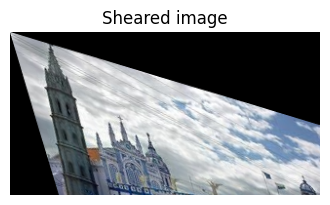

In [52]:
shear_factor = 0.3
shear_matrix = np.float32([[1, shear_factor, 0], [shear_factor, 1, 0]])
sheared_image = cv2.warpAffine(image, shear_matrix, (w, h))
display_image('Sheared image', sheared_image)

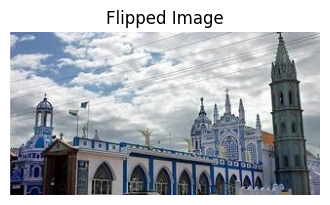

In [53]:
flipped_image = cv2.flip(image, 1)
display_image('Flipped Image', flipped_image)

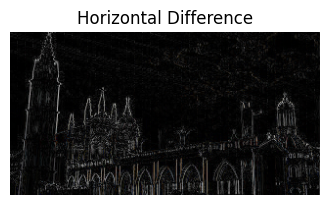

In [54]:
diff_x = cv2.absdiff(image[:, 1:], image[:, :-1])
display_image('Horizontal Difference', diff_x)

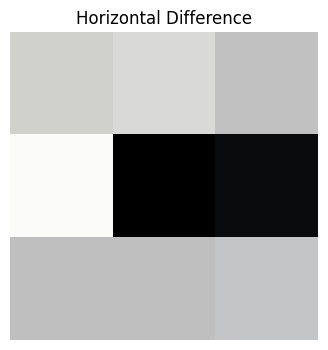

In [58]:
center_pixel = (100, 100)  # You can change this to any pixel in the image
x, y = center_pixel
neighborhood = image[x-1:x+2, y-1:y+2]
center_intensity = image[x, y]
intensity_diff = neighborhood - center_intensity

display_image('Horizontal Difference', intensity_diff)

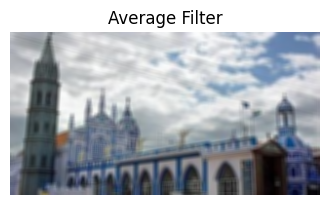

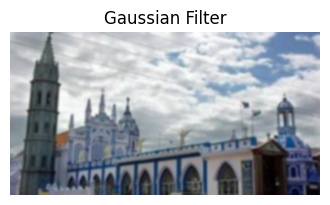

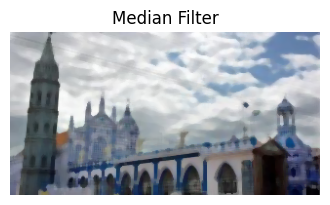

In [55]:
avg_filtered = cv2.blur(image, (5, 5))
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)
median_filtered = cv2.medianBlur(image, 5)

display_image('Average Filter',  avg_filtered)
display_image('Gaussian Filter',  gaussian_filtered)
display_image('Median Filter',  median_filtered)

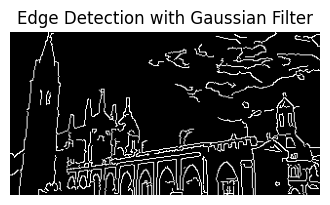

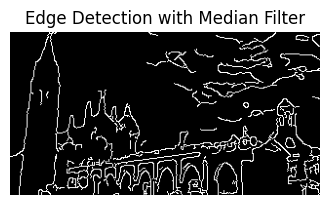

In [56]:
edges_gaussian = cv2.Canny(gaussian_filtered, 100, 200)
edges_median = cv2.Canny(median_filtered, 100, 200)
display_image('Edge Detection with Gaussian Filter', edges_gaussian)
display_image('Edge Detection with Median Filter', edges_median)

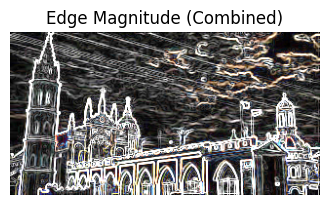

In [57]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)
display_image('Edge Magnitude (Combined)', gradient_magnitude)